In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,precision_score



In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
x_train = df.iloc[0:27455, 1:785].values
y_train = df.iloc[0:27455, 0].values

In [5]:
x_test = df_test.iloc[0:7172, 1:785].values
y_test = df_test.iloc[0:7172,0].values

In [6]:
label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.fit_transform(y_test)

In [9]:
from sklearn.svm import SVC

classifier = SVC(decision_function_shape='ovr')

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.99      0.99       432
           2       0.88      0.99      0.93       310
           3       0.92      1.00      0.95       245
           4       0.94      0.99      0.97       498
           5       0.78      0.83      0.80       247
           6       0.93      0.93      0.93       348
           7       0.98      0.94      0.96       436
           8       0.80      0.90      0.85       288
           9       0.79      0.59      0.67       331
          10       0.87      1.00      0.93       209
          11       0.85      0.75      0.79       394
          12       0.90      0.68      0.78       291
          13       0.99      0.83      0.90       246
          14       1.00      1.00      1.00       347
          15       1.00      0.99      0.99       164
          16       0.28      0.54      0.37       144
          17       0.71    

<AxesSubplot:>

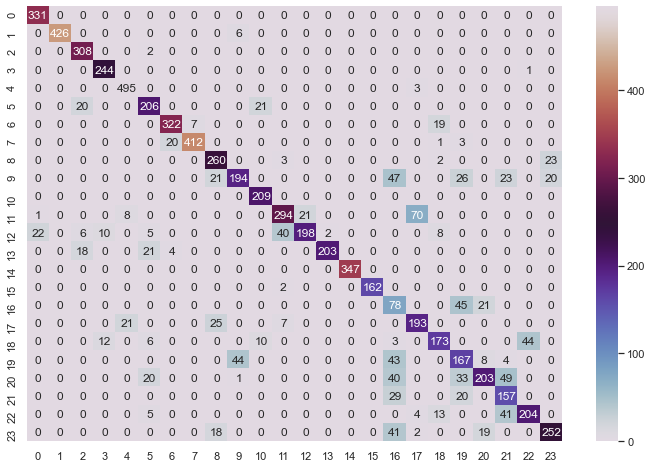

In [12]:


import pickle
from sklearn.metrics import classification_report
import seaborn as sns
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
plt.figure(figsize = (12,8))
sns.heatmap(cm, annot=True,fmt='g',cmap='twilight')


In [12]:
filename = 'svm_asl.h5'
pickle.dump(classifier, open(filename, 'wb'))

In [13]:
loaded_model = pickle.load(open("svm_asl.h5", 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8418851087562744
